In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sat_utils import starlink_constellation_v1, starlink_constellation_v2, create_constellation, Constellation, oneweb_constellation
from skyfield.api import EarthSatellite
from skyfield.api import load, wgs84
import time
from mpl_toolkits import mplot3d
from rubin_sim.utils import gnomonic_project_toxy, _angularSeparation


In [2]:
star_tles = starlink_constellation_v1() #oneweb_constellation() #starlink_constellation_v1()
print(len(star_tles))

4408


In [3]:
# Make a Constellation object
const = Constellation(star_tles)

Text(0.5, 1.0, 'Starlink V1 (4408 satellites)')

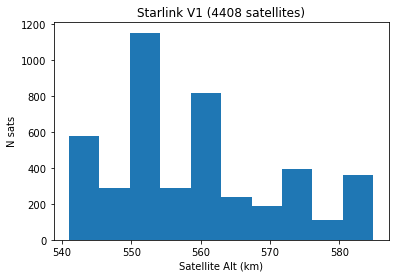

In [4]:
# reach in and set the time
MJDOFFSET = 2400000.5
mjd = 60218.5
jd = mjd + MJDOFFSET
t = const.ts.ut1_jd(jd)
# Find the positions of the satellites
positions =  np.array([sat.at(t).position.km for sat in const.sat_list])/6.37e3
d = np.sqrt(positions[:,0]**2 +  positions[:,1]**2 + positions[:,2]**2)

fig, ax = plt.subplots()
ax.hist((d-1.)*6.37e3)
ax.set_xlabel('Satellite Alt (km)')
ax.set_ylabel('N sats')
ax.set_title('Starlink V1 (%i satellites)' % len(star_tles))

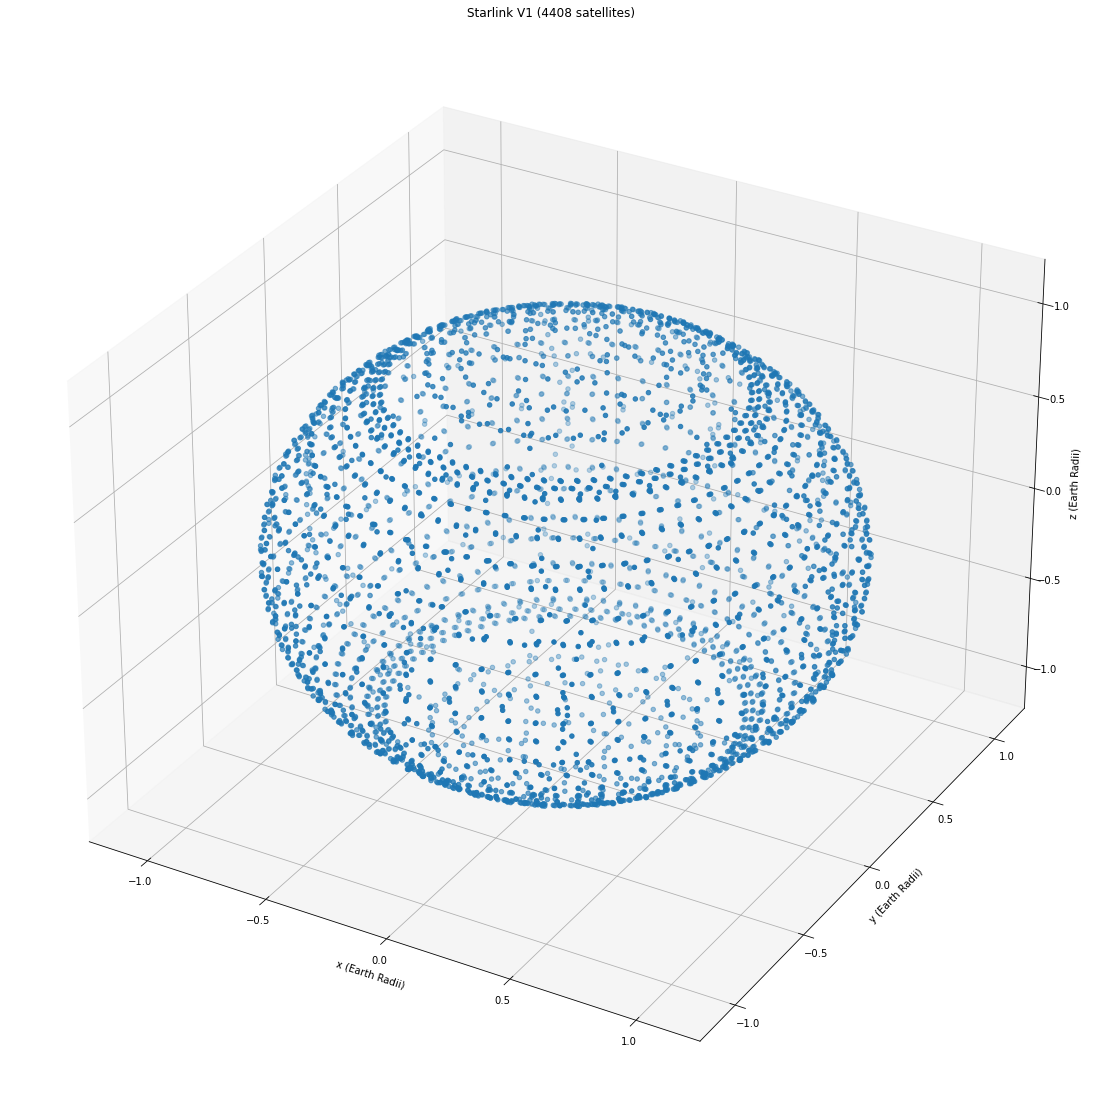

In [8]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter(positions[:,0], positions[:,1], positions[:,2])
ax.set_xlabel('x (Earth Radii)')
ax.set_ylabel('y (Earth Radii)')
ax.set_zlabel('z (Earth Radii)')
ax.set_title('Starlink V1 (%i satellites)' % len(star_tles))

plt.savefig('starlinkv1.pdf')

Text(0.5, 1.0, 'OneWeb (6372 satellites)')

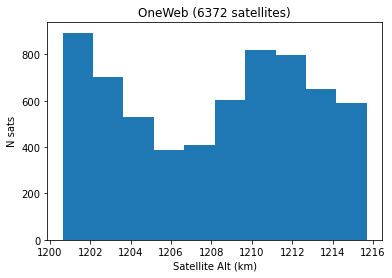

In [9]:
star_tles = oneweb_constellation() #oneweb_constellation() #starlink_constellation_v1()

const = Constellation(star_tles)
# reach in and set the time
MJDOFFSET = 2400000.5
mjd = 60218.5
jd = mjd + MJDOFFSET
t = const.ts.ut1_jd(jd)
# Find the positions of the satellites
positions =  np.array([sat.at(t).position.km for sat in const.sat_list])/6.37e3  # km to earth radii
d = np.sqrt(positions[:,0]**2 +  positions[:,1]**2 + positions[:,2]**2)

fig, ax = plt.subplots()
ax.hist((d-1.)*6.37e3)
ax.set_xlabel('Satellite Alt (km)')
ax.set_ylabel('N sats')
ax.set_title('OneWeb (%i satellites)' % len(star_tles))

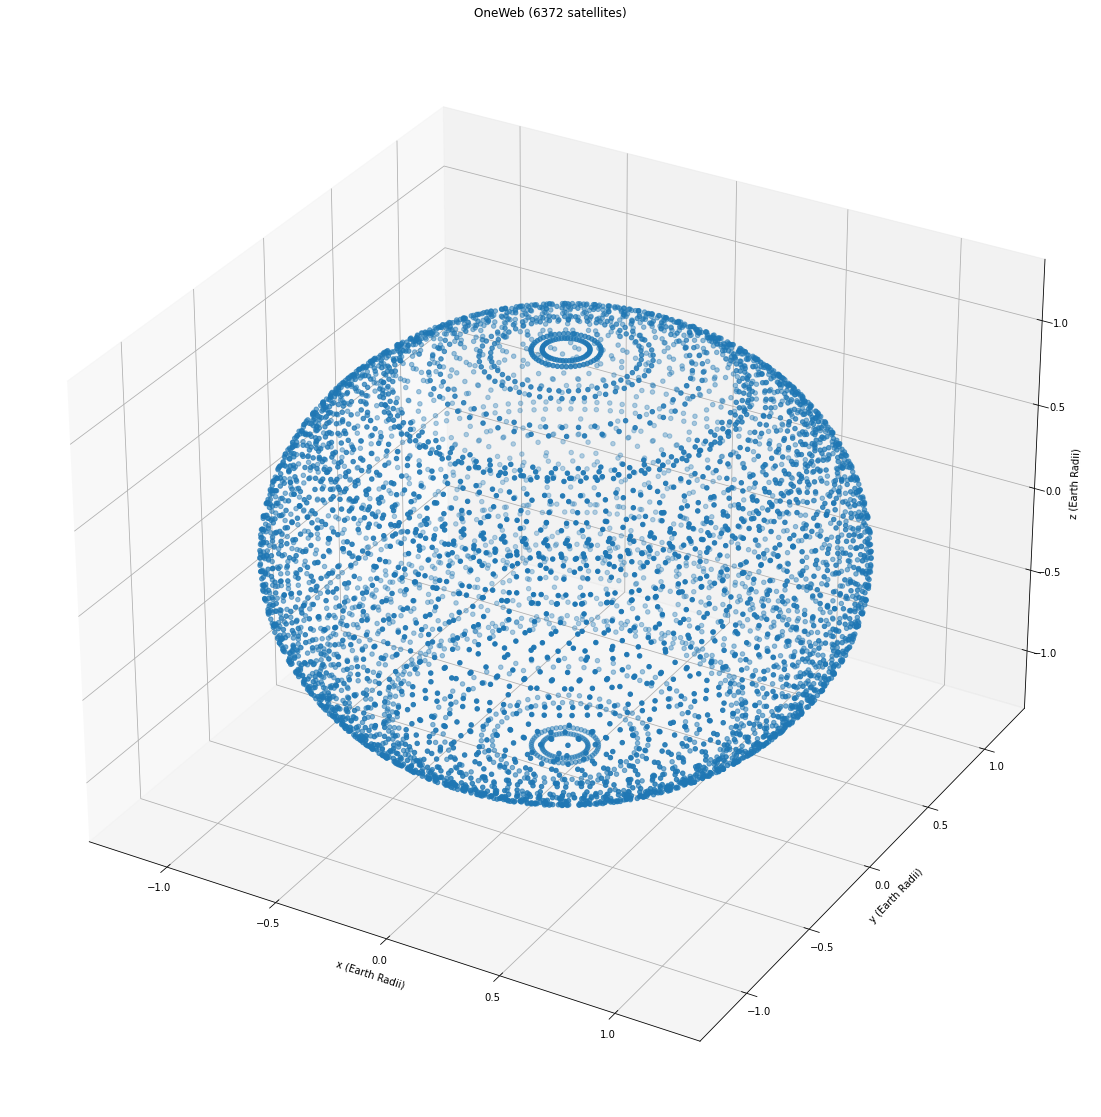

In [10]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter(positions[:,0], positions[:,1], positions[:,2])
ax.set_xlabel('x (Earth Radii)')
ax.set_ylabel('y (Earth Radii)')
ax.set_zlabel('z (Earth Radii)')
ax.set_title('OneWeb (%i satellites)' % len(star_tles))
plt.savefig('oneweb.pdf')

Text(0.5, 1.0, 'Starlink V2 (29988 satellites)')

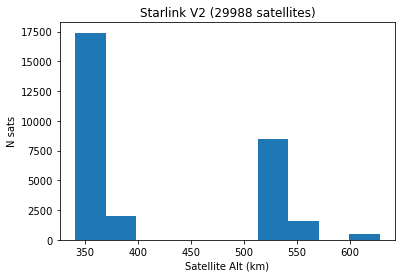

In [11]:
star_tles = starlink_constellation_v2() #oneweb_constellation() #starlink_constellation_v1()

const = Constellation(star_tles)
# reach in and set the time
MJDOFFSET = 2400000.5
mjd = 60218.5
jd = mjd + MJDOFFSET
t = const.ts.ut1_jd(jd)
# Find the positions of the satellites
positions =  np.array([sat.at(t).position.km for sat in const.sat_list])/6.37e3
d = np.sqrt(positions[:,0]**2 +  positions[:,1]**2 + positions[:,2]**2)

fig, ax = plt.subplots()
ax.hist((d-1.)*6.37e3)
ax.set_xlabel('Satellite Alt (km)')
ax.set_ylabel('N sats')
ax.set_title('Starlink V2 (%i satellites)' % len(star_tles))

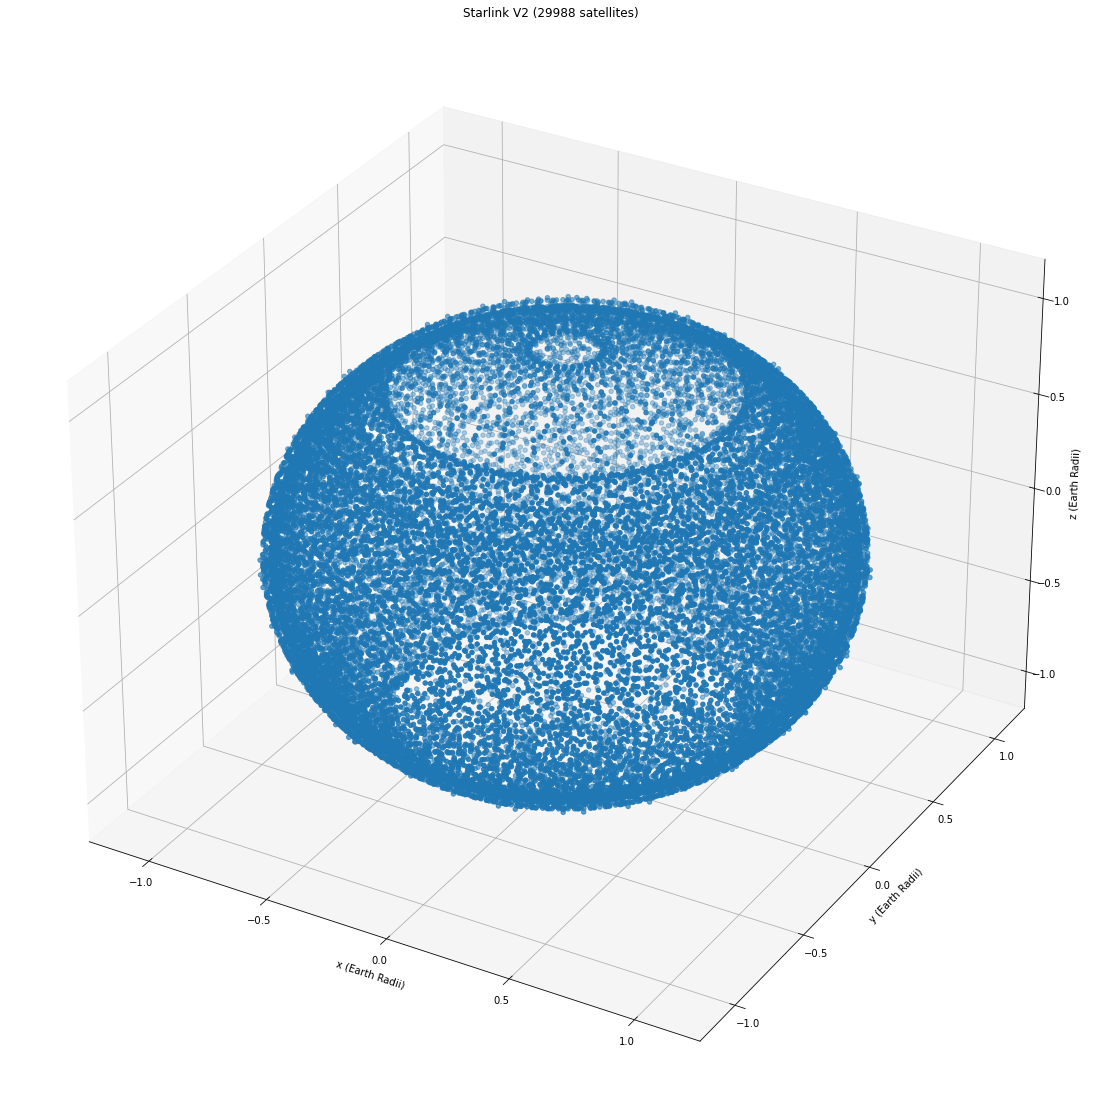

In [12]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter(positions[:,0], positions[:,1], positions[:,2])
ax.set_xlabel('x (Earth Radii)')
ax.set_ylabel('y (Earth Radii)')
ax.set_zlabel('z (Earth Radii)')
ax.set_title('Starlink V2 (%i satellites)' % len(star_tles))
plt.savefig('starlinkv2.pdf')

In [10]:
MJDOFFSET = 2400000.5
# can I update with an array of times
mjds = np.arange(0,1000)/999. + 60218
jd = mjds + MJDOFFSET
t = const.ts.ut1_jd(jd)
current_sat = const.sat_list[0].at(t)
illum = current_sat.is_sunlit(const.eph)

In [11]:
topo = current_sat - const.observatory_site.at(t)

In [12]:
alt, az, dist = topo.altaz()

In [13]:
const.update_mjd(60218.0018055556)

In [14]:
const.altitudes_rad

array([-0.00596085,  0.01178801,         nan, ...,         nan,
               nan,         nan])

In [15]:
const.azimuth_rad

array([3.13667256, 2.96570667,        nan, ...,        nan,        nan,
              nan])

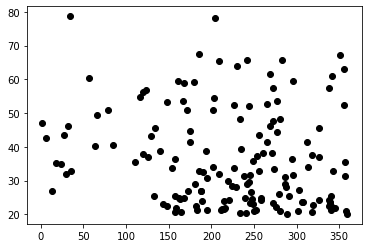

In [16]:
indx = const.visible
plt.plot(np.degrees(const.azimuth_rad[indx]), np.degrees(const.altitudes_rad[indx]), 'ko')

In [17]:
t1 = time.time()
const.update_mjd(60218.0018055556 + 1)
t2 = time.time()
print('update time= %f s' % (t2-t1))

update time= 41.231798 s


In [18]:
t1 = time.time()
const.update_mjd(60218.0018055556 + 3000)
t2 = time.time()
print('update time= %f s' % (t2-t1))

update time= 28.842671 s


Text(0, 0.5, 'Alt (deg)')

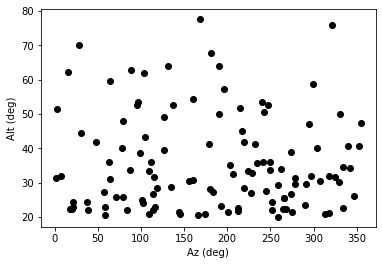

In [19]:
indx = const.visible
plt.plot(np.degrees(const.azimuth_rad[indx]), np.degrees(const.altitudes_rad[indx]), 'ko')
plt.xlabel('Az (deg)')
plt.ylabel('Alt (deg)')

In [20]:
const.update_mjd(60218.0018055556 + 1.5)

Text(0, 0.5, 'Alt (deg)')

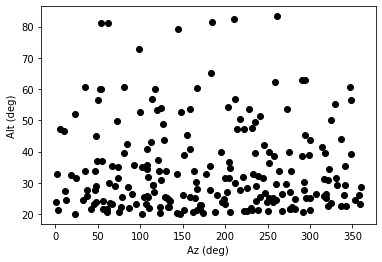

In [21]:
indx = const.visible
plt.plot(np.degrees(const.azimuth_rad[indx]), np.degrees(const.altitudes_rad[indx]), 'ko')
plt.xlabel('Az (deg)')
plt.ylabel('Alt (deg)')

In [22]:
len(star_tles)

29988

In [23]:
# Let's see how far satellites move on a 34s timescale. 
start = 60218+5
const.update_mjd(start)
alt1 = const.altitudes_rad + 0
az1 = const.azimuth_rad + 0
indx = const.visible

dt = 34/3600/24
const.update_mjd(start+dt)
alt2 = const.altitudes_rad + 0
az2 = const.azimuth_rad + 0


In [24]:
seps = _angularSeparation(az1, alt1, az2, alt2)

Text(0, 0.5, 'N satellites')

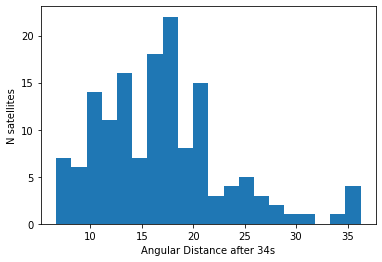

In [25]:
ack = plt.hist(np.degrees(seps[indx]), bins=20)
plt.xlabel('Angular Distance after 34s')
plt.ylabel('N satellites')